In [12]:
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [173]:
mortality_asthma_copd_df = pd.read_csv('../intermediary_files/mortality_asthma_copd.csv')

hospitalization_asthma_copd_df =  pd.read_csv('../intermediary_files/hospitalization_asthma_copd.csv')

forcasted_smoke_estimates = pd.read_csv('../intermediary_files/smoke_estimates_with_forecast.csv')
forcasted_smoke_estimates = forcasted_smoke_estimates[forcasted_smoke_estimates['year'] > 2020]

In [174]:
mortality_asthma_copd_df

,Unnamed: 0,cause_name,sex,mx,year,smoke_estimate
0,0,Chronic obstructive pulmonary disease,Male,62.384962,1980,6.475663
1,1,Chronic obstructive pulmonary disease,Male,62.384962,1980,2.913322
2,2,Chronic obstructive pulmonary disease,Male,62.384962,1980,2.130284
3,3,Chronic obstructive pulmonary disease,Male,62.384962,1980,0.851539
4,4,Chronic obstructive pulmonary disease,Male,62.384962,1980,0.811558
...,...,...,...,...,...,...
57589,57589,Asthma,Both,1.074769,2014,0.001470
57590,57590,Asthma,Both,1.074769,2014,0.001236
57591,57591,Asthma,Both,1.074769,2014,0.001141
57592,57592,Asthma,Both,1.074769,2014,0.001515


In [175]:
hospitalization_asthma_copd_df

,Unnamed: 0,year,sex_x,copd_hosp_value,sex_y,asthma_hosp_value,smoke_estimate
0,0,2010,Male,9.9,Male,6.5,30.668830
1,1,2010,Male,9.9,Male,6.5,8.707322
2,2,2010,Male,9.9,Male,6.5,2.119830
3,3,2010,Male,9.9,Male,6.5,22.389660
4,4,2010,Male,9.9,Male,6.5,16.201209
...,...,...,...,...,...,...,...
23219,23219,2020,Female,4.5,Female,1.9,0.003658
23220,23220,2020,Female,4.5,Female,1.9,0.010507
23221,23221,2020,Female,4.5,Female,1.9,0.008430
23222,23222,2020,Female,4.5,Female,1.9,0.001402


In [176]:
# Step 1: Prepare Data
mortality_asthma_copd_df['sex'] = mortality_asthma_copd_df['sex'].replace({'Male': 1, 'Female': 2, 'Both': 3})
# mortality_asthma_copd_df.set_index('year', inplace=True)  # Set year as index
y = mortality_asthma_copd_df.groupby('year')['mx'].sum()  # Target variable
X = mortality_asthma_copd_df.groupby('year')['smoke_estimate'].mean()  # Predictor

# Step 1: Prepare Data
hospitalization_asthma_copd_df['sex'] = hospitalization_asthma_copd_df['sex_x'].replace({'Male': 1, 'Female': 2, 'Both': 3})

hosp_male_asthma_copd_df = hospitalization_asthma_copd_df[hospitalization_asthma_copd_df['sex'] == 1]
hosp_female_asthma_copd_df = hospitalization_asthma_copd_df[hospitalization_asthma_copd_df['sex'] == 2]


y_asthma_hosp = hospitalization_asthma_copd_df.groupby('year')['asthma_hosp_value'].sum()  # Target variable
X_asthma_hosp = hospitalization_asthma_copd_df.groupby('year')['smoke_estimate'].mean()  # Predictor

y_copd_hosp = hospitalization_asthma_copd_df.groupby('year')['copd_hosp_value'].sum()  # Target variable
X_copd_hosp = hospitalization_asthma_copd_df.groupby('year')['smoke_estimate'].mean()  # Predictor

# male
y_male_asthma_hosp = hosp_male_asthma_copd_df.groupby('year')['asthma_hosp_value'].sum()  # Target variable
X_male_asthma_hosp = hosp_male_asthma_copd_df.groupby('year')['smoke_estimate'].mean()  # Predictor

y_male_copd_hosp = hosp_male_asthma_copd_df.groupby('year')['copd_hosp_value'].sum()  # Target variable
X_male_copd_hosp = hosp_male_asthma_copd_df.groupby('year')['smoke_estimate'].mean()  # Predictor

# female
y_female_asthma_hosp = hosp_female_asthma_copd_df.groupby('year')['asthma_hosp_value'].sum()  # Target variable
X_female_asthma_hosp = hosp_female_asthma_copd_df.groupby('year')['smoke_estimate'].mean()  # Predictor

y_female_copd_hosp = hosp_female_asthma_copd_df.groupby('year')['copd_hosp_value'].sum()  # Target variable
X_female_copd_hosp = hosp_female_asthma_copd_df.groupby('year')['smoke_estimate'].mean()  # Predictor


/var/folders/ld/y0zsw11s34q_fr6m889pmps40000gp/T/ipykernel_15417/2817320367.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mortality_asthma_copd_df['sex'] = mortality_asthma_copd_df['sex'].replace({'Male': 1, 'Female': 2, 'Both': 3})
/var/folders/ld/y0zsw11s34q_fr6m889pmps40000gp/T/ipykernel_15417/2817320367.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hospitalization_asthma_copd_df['sex'] = hospitalization_asthma_copd_df['sex_x'].replace({'Male': 1, 'Female': 2, 'Both': 3})


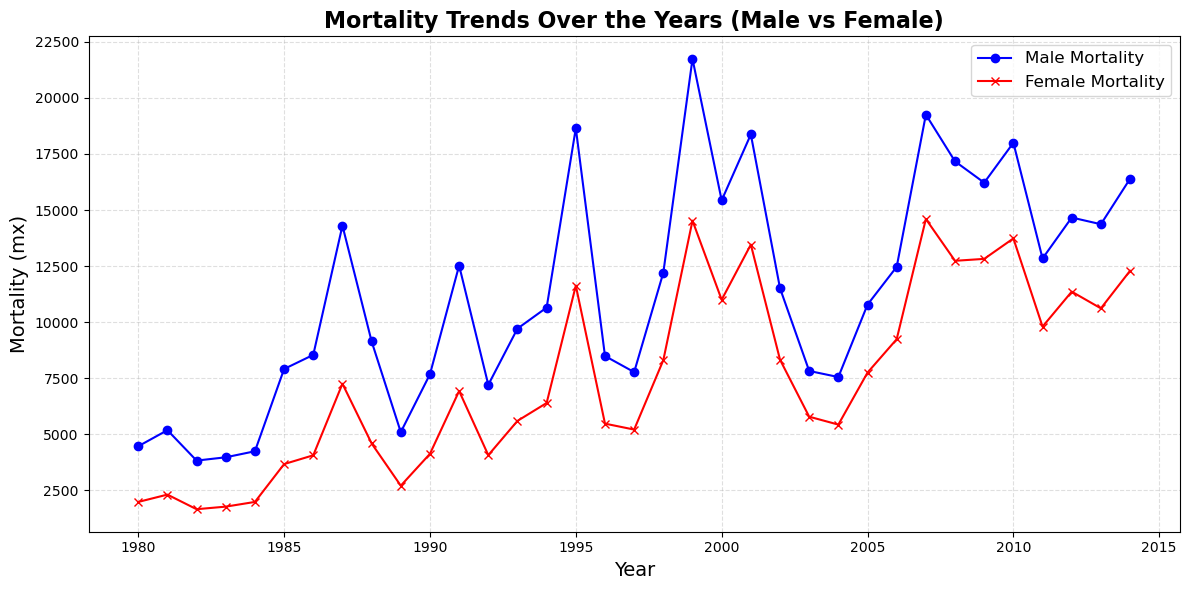

In [177]:

# Filter the data for male and female
male_data = mortality_asthma_copd_df[mortality_asthma_copd_df['sex'] == 1]
female_data = mortality_asthma_copd_df[mortality_asthma_copd_df['sex'] == 2]

# Group data by year and calculate the sum of mortality ('mx') for each gender
male_mortality = male_data.groupby('year')['mx'].sum()
female_mortality = female_data.groupby('year')['mx'].sum()

# Plot the data
plt.figure(figsize=(12, 6))

plt.plot(male_mortality.index, male_mortality.values, label='Male Mortality', color='blue', marker='o')
plt.plot(female_mortality.index, female_mortality.values, label='Female Mortality', color='red', marker='x')

# Add labels, title, and legend
plt.title('Mortality Trends Over the Years (Male vs Female)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality (mx)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()


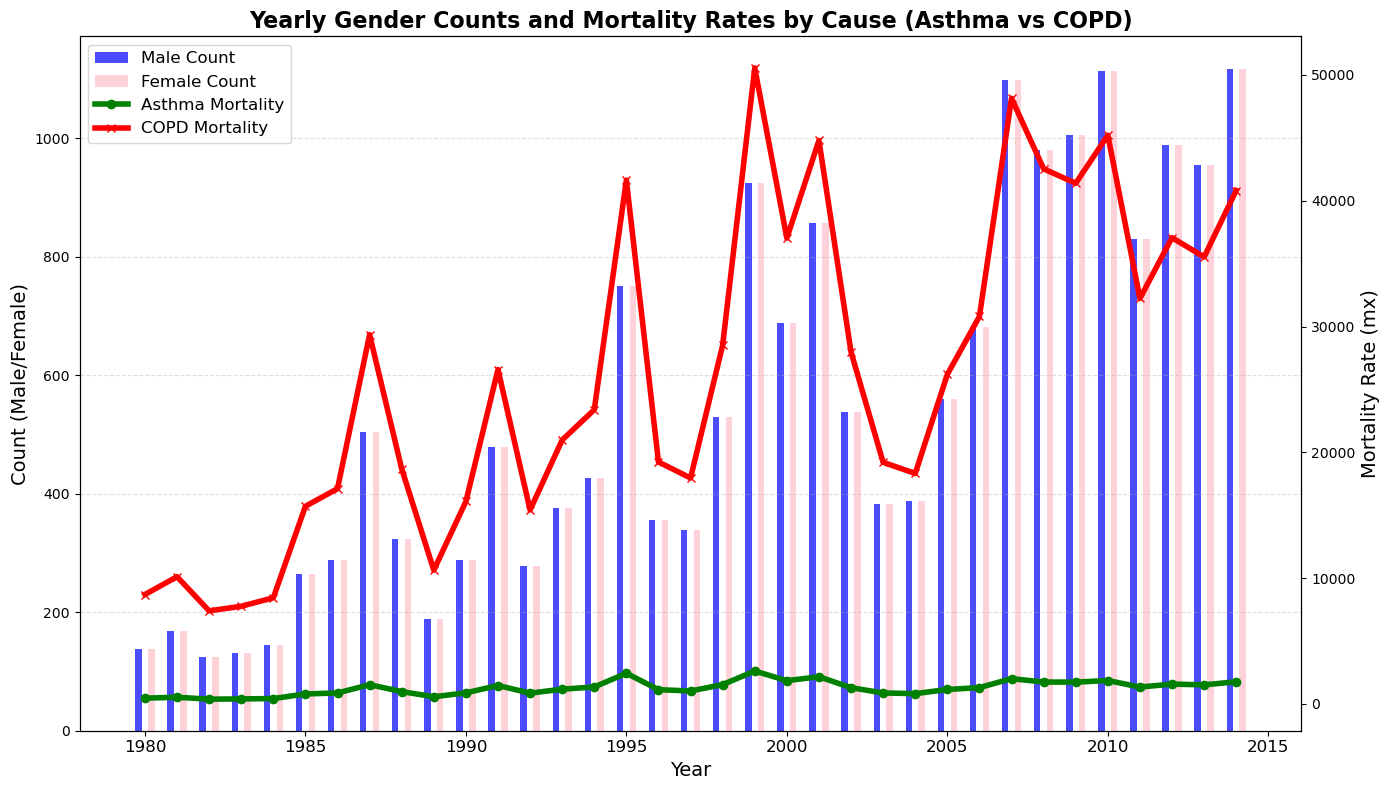

In [ ]:

# Filter data by causes (Asthma and COPD)
asthma_data = mortality_asthma_copd_df[mortality_asthma_copd_df['cause_name'] == 'Asthma']
copd_data = mortality_asthma_copd_df[mortality_asthma_copd_df['cause_name'] == 'Chronic obstructive pulmonary disease']

# Group data by year and calculate the sum of mortality ('mx') for each cause
asthma_mortality = asthma_data.groupby('year')['mx'].sum()
copd_mortality = copd_data.groupby('year')['mx'].sum()

# Group data by year and sex, counting the number of occurrences (male and female)
gender_counts = mortality_asthma_copd_df.groupby(['year', 'sex']).size().unstack(fill_value=0)

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot male and female counts on the primary y-axis (bar chart)
ax1.bar(gender_counts.index - 0.2, gender_counts[1], width=0.2, label='Male Count', color='blue', alpha=0.7)
ax1.bar(gender_counts.index + 0.2, gender_counts[2], width=0.2, label='Female Count', color='pink', alpha=0.7)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Count (Male/Female)', fontsize=14, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.tick_params(axis='x', labelsize=12)
ax1.grid(alpha=0.4, linestyle='--', axis='y')

# Add secondary y-axis for mortality rates
ax2 = ax1.twinx()
ax2.plot(asthma_mortality.index, asthma_mortality.values, label='Asthma Mortality', color='green', marker='o', linewidth=4)
ax2.plot(copd_mortality.index, copd_mortality.values, label='COPD Mortality', color='red', marker='x', linewidth=4)
ax2.set_ylabel('Mortality Rate (mx)', fontsize=14, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', fontsize=12)

# Add title and adjust layout
plt.title('Yearly Gender Counts and Mortality Rates by Cause (Asthma vs COPD)', fontsize=16, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()


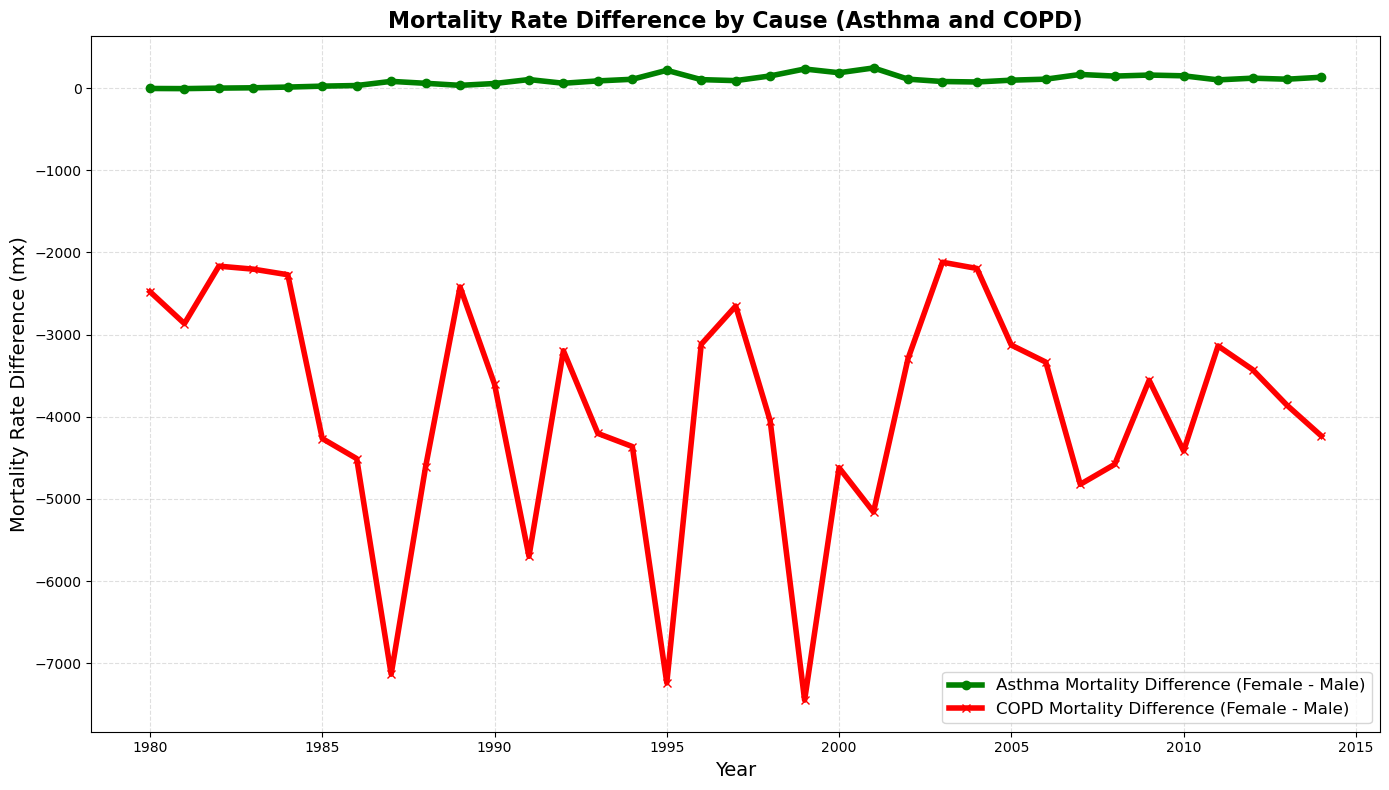

In [ ]:
# Filter data by causes (Asthma and COPD)
asthma_male = mortality_asthma_copd_df[(mortality_asthma_copd_df['cause_name'] == 'Asthma') & (mortality_asthma_copd_df['sex'] == 1)]
asthma_female = mortality_asthma_copd_df[(mortality_asthma_copd_df['cause_name'] == 'Asthma') & (mortality_asthma_copd_df['sex'] == 2)]
copd_male = mortality_asthma_copd_df[(mortality_asthma_copd_df['cause_name'] == 'Chronic obstructive pulmonary disease') & (mortality_asthma_copd_df['sex'] == 1)]
copd_female = mortality_asthma_copd_df[(mortality_asthma_copd_df['cause_name'] == 'Chronic obstructive pulmonary disease') & (mortality_asthma_copd_df['sex'] == 2)]

# Group data by year and calculate the sum of mortality ('mx') for each gender and cause
asthma_male_mortality = asthma_male.groupby('year')['mx'].sum()
asthma_female_mortality = asthma_female.groupby('year')['mx'].sum()
copd_male_mortality = copd_male.groupby('year')['mx'].sum()
copd_female_mortality = copd_female.groupby('year')['mx'].sum()

# Calculate the mortality rate difference between genders for each cause
asthma_gender_difference = asthma_female_mortality - asthma_male_mortality
copd_gender_difference = copd_female_mortality - copd_male_mortality

# Plot the data
plt.figure(figsize=(14, 8))

# Plot mortality rate difference for Asthma
plt.plot(asthma_gender_difference.index, asthma_gender_difference.values, label='Asthma Mortality Difference (Female - Male)', color='green', marker='o', linewidth=4)

# Plot mortality rate difference for COPD
plt.plot(copd_gender_difference.index, copd_gender_difference.values, label='COPD Mortality Difference (Female - Male)', color='red', marker='x', linewidth=4)

# Add labels, title, and legend
plt.title('Mortality Rate Difference by Cause (Asthma and COPD)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate Difference (mx)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()

# Show the plot
plt.show()


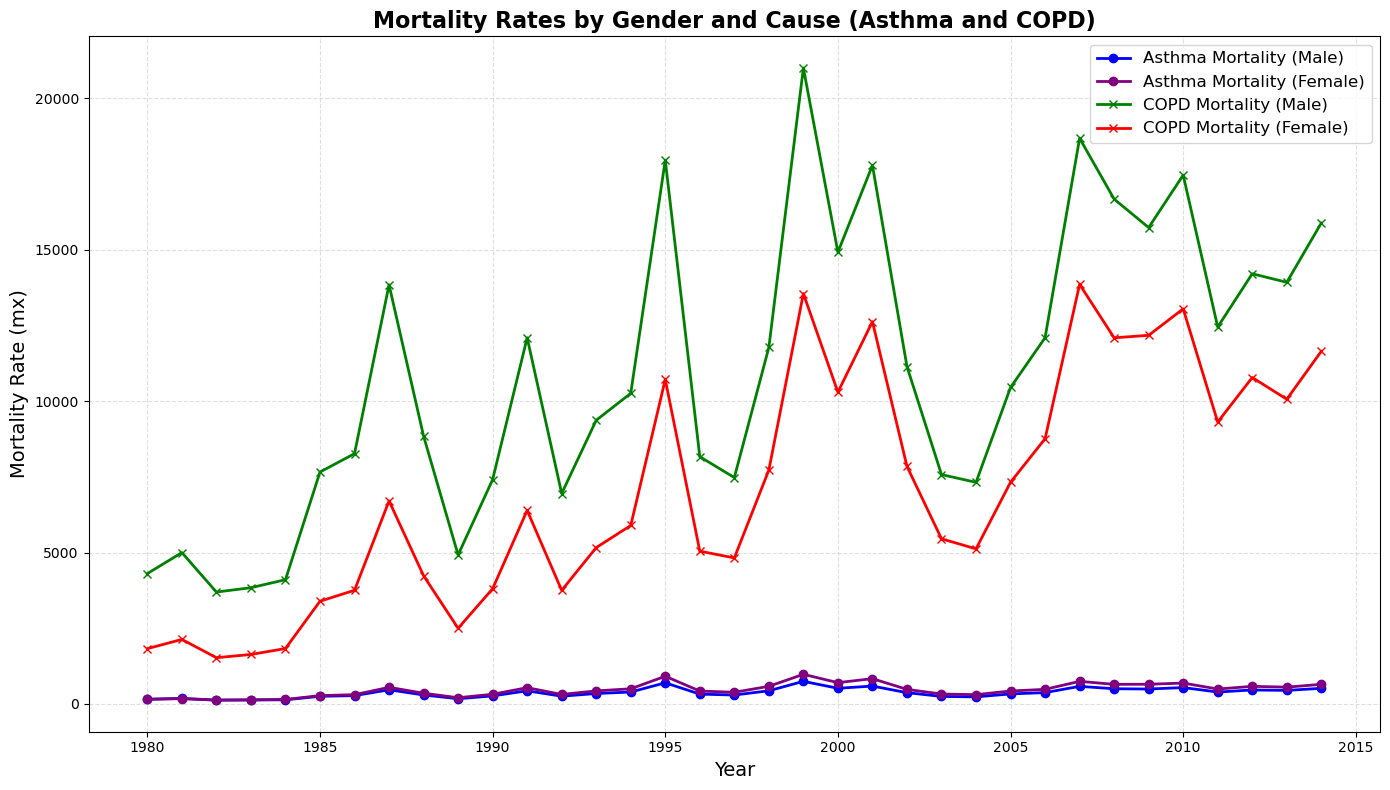

In [216]:
# Group data for Asthma and COPD by gender
asthma_male_mortality = asthma_male.groupby('year')['mx'].sum()
asthma_female_mortality = asthma_female.groupby('year')['mx'].sum()
copd_male_mortality = copd_male.groupby('year')['mx'].sum()
copd_female_mortality = copd_female.groupby('year')['mx'].sum()

# Plot the data
plt.figure(figsize=(14, 8))

# Plot Asthma mortality for males and females
plt.plot(asthma_male_mortality.index, asthma_male_mortality.values, label='Asthma Mortality (Male)', color='blue', marker='o', linewidth=2)
plt.plot(asthma_female_mortality.index, asthma_female_mortality.values, label='Asthma Mortality (Female)', color='purple', marker='o', linewidth=2)

# Plot COPD mortality for males and females
plt.plot(copd_male_mortality.index, copd_male_mortality.values, label='COPD Mortality (Male)', color='green', marker='x', linewidth=2)
plt.plot(copd_female_mortality.index, copd_female_mortality.values, label='COPD Mortality (Female)', color='red', marker='x', linewidth=2)

# Add labels, title, and legend
plt.title('Mortality Rates by Gender and Cause (Asthma and COPD)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate (mx)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4, linestyle='--')
plt.tight_layout()

# Show the plot
plt.show()


In [113]:
# Step 2: Train-Test Split
# Splitting the data into train and test with train containing all -1 year worth data

df_combined = pd.DataFrame({'smoke_estimates': X, 'mortality': y})

df_combined

,smoke_estimates,mortality
year,,
1980,1.503642,9165.069611
1981,0.339768,10652.130329
1982,0.169309,7784.048828
1983,0.265882,8167.881940
1984,0.301352,8870.168745
1985,9.933734,16506.762563
1986,5.208134,17992.511827
1987,14.344790,30887.915022
1988,1.562067,19669.746291


### Forcast for mortality with smoke estimates

/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in

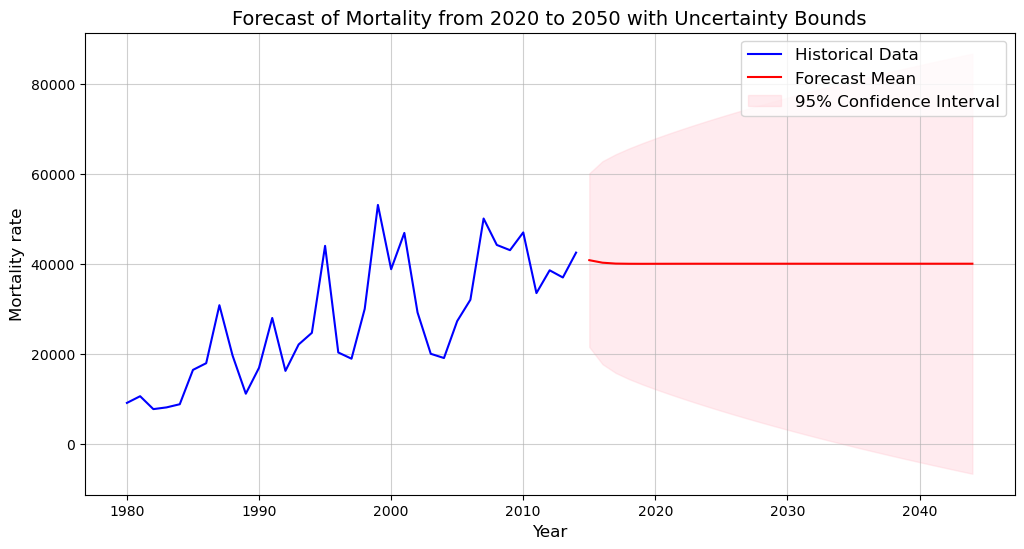

In [156]:
# Step 3: Build SARIMAX Model
model = SARIMAX(df_combined['mortality'], exog=df_combined['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# # Step 4: Make Predictions
# predictions = model_fit.predict(start=len(train_data), end=1, exog=test_data['smoke_estimates'])

# # Step 5: Evaluate the Model
# mae = mean_absolute_error(test_y, predictions)
# rmse = mean_squared_error(test_y, predictions, squared=False)
# print(f"MAE: {mae}, RMSE: {rmse}")

# Step 2: Forecast with Confidence Intervals
forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
forecast_index = pd.RangeIndex(start=df_combined.index[-1] + 1, stop=df_combined.index[-1] + 31)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 3: Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_combined.index, df_combined['mortality'], label='Historical Data', color='blue')

# Plot forecast mean
plt.plot(forecast_index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Forecast of Mortality from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mortality rate', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.6)
plt.show()


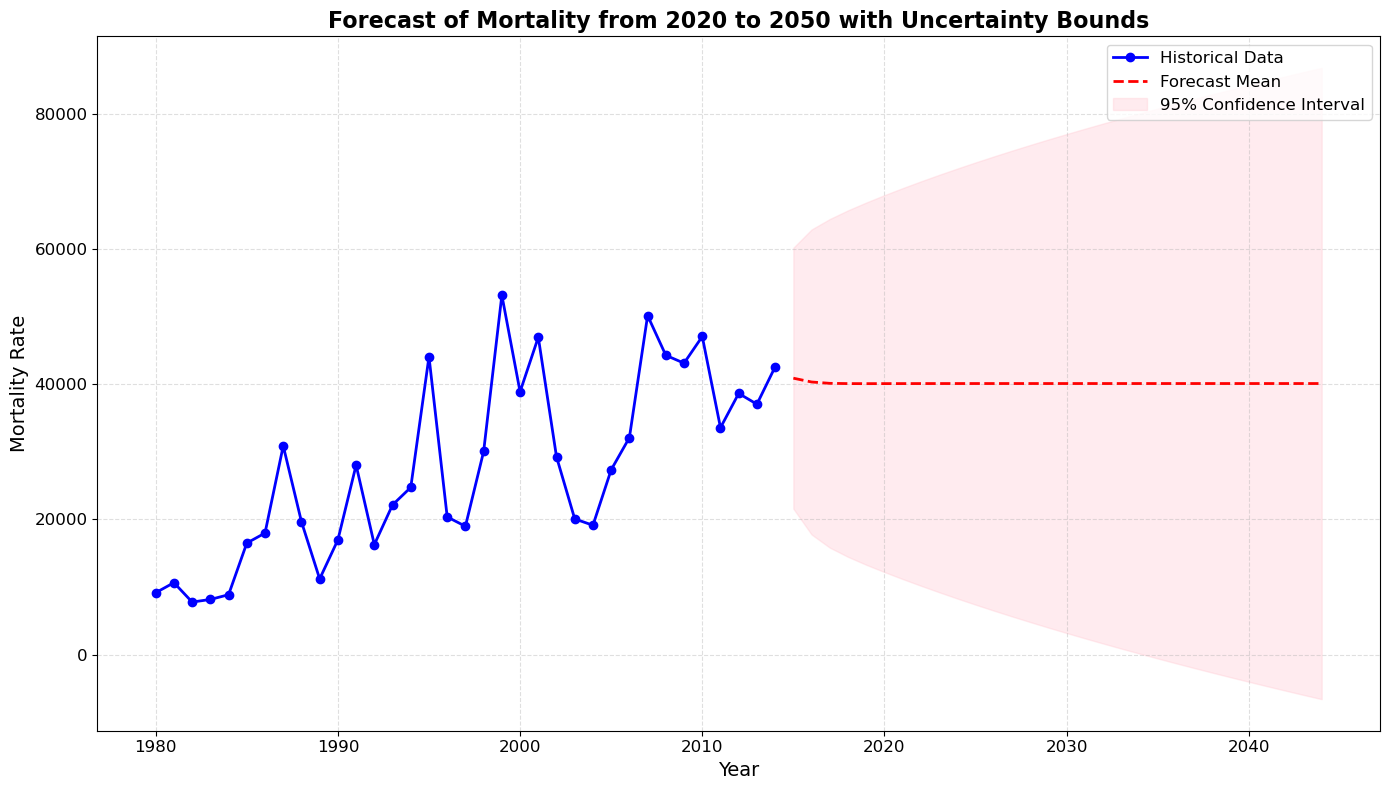

In [157]:
import matplotlib.pyplot as plt

# Assuming the data and forecast are properly set up as in your provided code snippet
# Clean and visually appealing plot for mortality forecast

plt.figure(figsize=(14, 8))

# Plot historical data
plt.plot(
    df_combined.index,
    df_combined['mortality'],
    label='Historical Data',
    color='blue',
    linestyle='-',
    marker='o',
    linewidth=2
)

# Plot forecast mean
plt.plot(
    forecast_index,
    forecast_mean,
    label='Forecast Mean',
    color='red',
    linestyle='--',
    linewidth=2
)

# Plot confidence intervals
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

# Add labels, title, and legend
plt.title('Forecast of Mortality from 2020 to 2050 with Uncertainty Bounds', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortality Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in

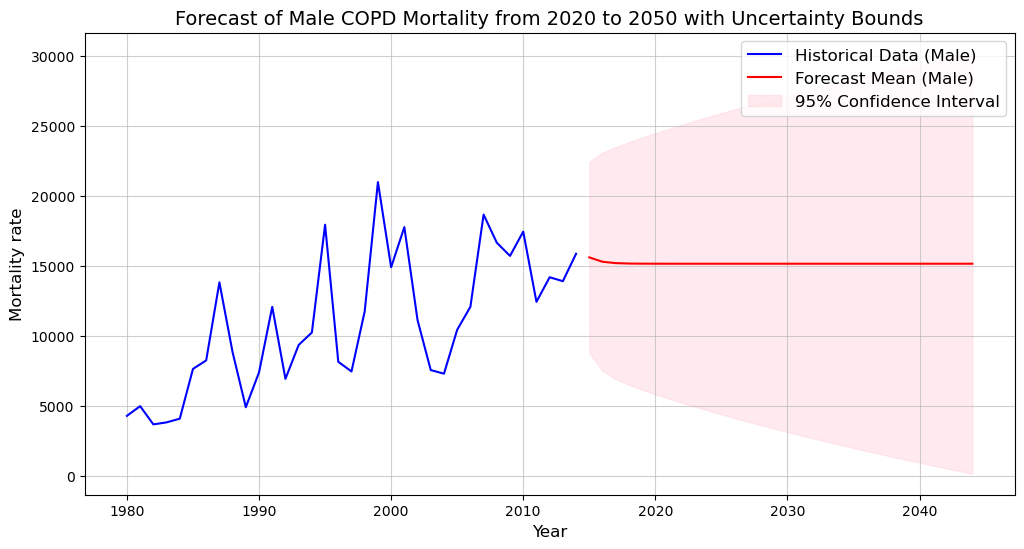

In [208]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Filter COPD data for males and females
copd_male_data = copd_data[copd_data['sex'] == 1]
copd_female_data = copd_data[copd_data['sex'] == 2]

# Group data by year for male
male_y = copd_male_data.groupby('year')['mx'].sum()  # Target variable for males
male_X = copd_male_data.groupby('year')['smoke_estimate'].mean()  # Predictor for males

# Group data by year for female
female_y = copd_female_data.groupby('year')['mx'].sum()  # Target variable for females
female_X = copd_female_data.groupby('year')['smoke_estimate'].mean()  # Predictor for females

# Step 2: Define a function to build SARIMAX model and forecast
def build_and_forecast(y, X, forcasted_smoke_estimates, gender):
    # Combine into a single DataFrame
    df_combined = pd.DataFrame({'mortality': y, 'smoke_estimates': X})
    
    # Step 3: Build SARIMAX Model
    model = SARIMAX(df_combined['mortality'], exog=df_combined['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit(disp=False)
    
    # Step 4: Forecast with Confidence Intervals
    forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
    forecast_index = pd.RangeIndex(start=df_combined.index[-1] + 1, stop=df_combined.index[-1] + 31)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()
    
    # Step 5: Plot Historical Data and Forecast
    plt.figure(figsize=(12, 6))
    plt.plot(df_combined.index, df_combined['mortality'], label=f'Historical Data ({gender})', color='blue' if gender == 'Male' else 'purple')
    plt.plot(forecast_index, forecast_mean, label=f'Forecast Mean ({gender})', color='red')
    plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
    plt.title(f'Forecast of {gender} COPD Mortality from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Mortality rate', fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid(alpha=0.6)
    plt.show()

# Step 6: Forecast for Male and Female
# forcasted_smoke_estimates = pd.DataFrame({'annual_smoke_estimate': [X.mean()] * 30})  # Replace with actual forecasted smoke estimates
build_and_forecast(male_y, male_X, forcasted_smoke_estimates, gender='Male')
# build_and_forecast(female_y, female_X, forcasted_smoke_estimates, gender='Female')


<Axes: xlabel='years'>

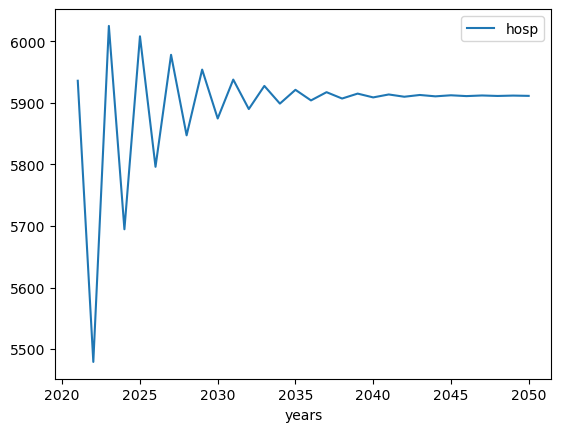

In [209]:
forcast_df = pd.DataFrame({'years': forecast_index, 'hosp': forecast_mean}).set_index('years')
forcast_df.plot()

### Forcast for Asthma hospitalization

In [184]:
df_combined_asthma = pd.DataFrame({'smoke_estimates': X_asthma_hosp, 'hospitalization': y_asthma_hosp})
df_combined_asthma_male = pd.DataFrame({'smoke_estimates': X_male_asthma_hosp, 'hospitalization': y_male_asthma_hosp})
df_combined_asthma_female = pd.DataFrame({'smoke_estimates': X_female_asthma_hosp, 'hospitalization': y_female_asthma_hosp})

/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an intege

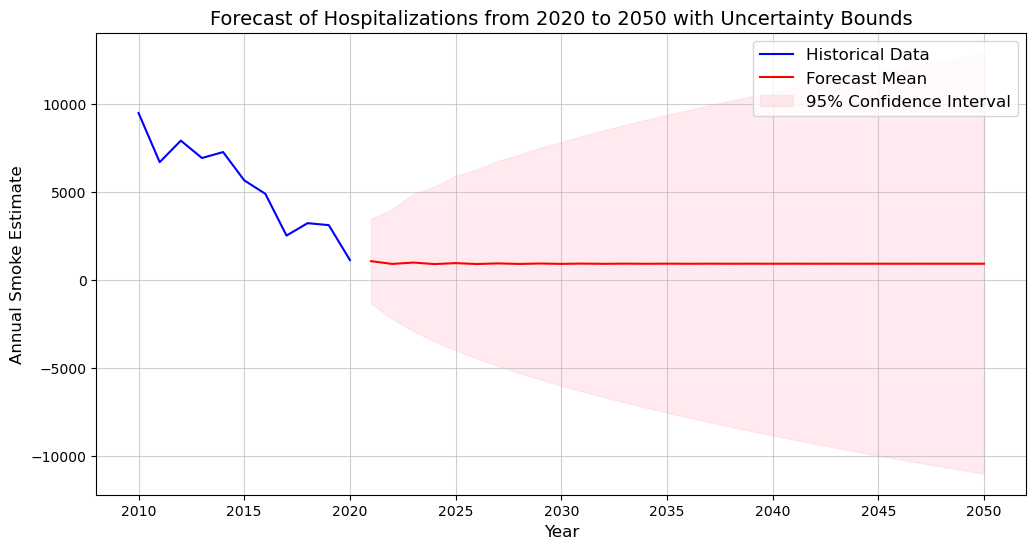

In [170]:
# Step 3: Build SARIMAX Model
model = SARIMAX(df_combined_asthma['hospitalization'], exog=df_combined_asthma['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# # Step 4: Make Predictions
# predictions = model_fit.predict(start=len(train_data), end=1, exog=test_data['smoke_estimates'])

# # Step 5: Evaluate the Model
# mae = mean_absolute_error(test_y, predictions)
# rmse = mean_squared_error(test_y, predictions, squared=False)
# print(f"MAE: {mae}, RMSE: {rmse}")

# Step 2: Forecast with Confidence Intervals
forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
forecast_index = pd.RangeIndex(start=df_combined_asthma.index[-1] + 1, stop=df_combined_asthma.index[-1] + 31)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 3: Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_combined_asthma.index, df_combined_asthma['hospitalization'], label='Historical Data', color='blue')

# Plot forecast mean
plt.plot(forecast_index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Forecast of Hospitalizations from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Smoke Estimate', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.6)
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an intege

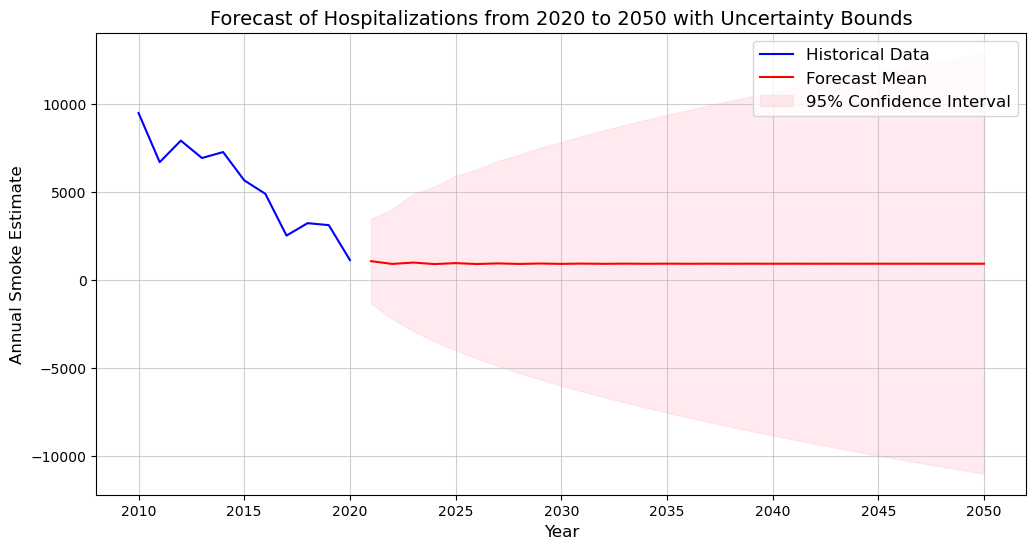

In [189]:
# Step 3: Build SARIMAX Model
model = SARIMAX(df_combined_asthma_male['hospitalization'], exog=df_combined_asthma_male['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# # Step 4: Make Predictions
# predictions = model_fit.predict(start=len(train_data), end=1, exog=test_data['smoke_estimates'])

# # Step 5: Evaluate the Model
# mae = mean_absolute_error(test_y, predictions)
# rmse = mean_squared_error(test_y, predictions, squared=False)
# print(f"MAE: {mae}, RMSE: {rmse}")

# Step 2: Forecast with Confidence Intervals
forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
forecast_index = pd.RangeIndex(start=df_combined_asthma_male.index[-1] + 1, stop=df_combined_asthma_male.index[-1] + 31)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 3: Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_combined_asthma_male.index, df_combined_asthma_male['hospitalization'], label='Historical Data', color='blue')

# Plot forecast mean
plt.plot(forecast_index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Forecast of Hospitalizations from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Smoke Estimate', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.6)
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an intege

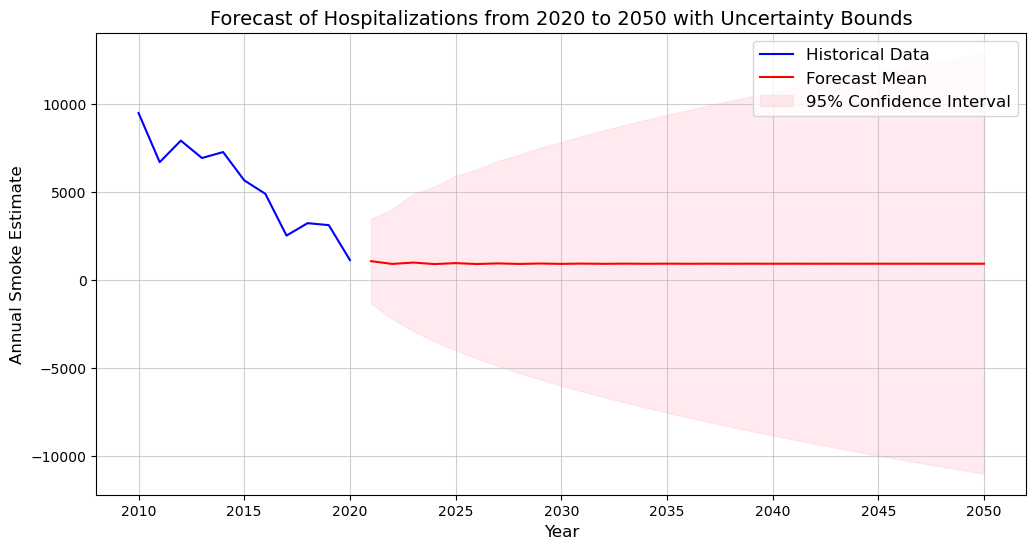

In [186]:
# Step 3: Build SARIMAX Model
model = SARIMAX(df_combined_asthma_female['hospitalization'], exog=df_combined_asthma_female['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# # Step 4: Make Predictions
# predictions = model_fit.predict(start=len(train_data), end=1, exog=test_data['smoke_estimates'])

# # Step 5: Evaluate the Model
# mae = mean_absolute_error(test_y, predictions)
# rmse = mean_squared_error(test_y, predictions, squared=False)
# print(f"MAE: {mae}, RMSE: {rmse}")

# Step 2: Forecast with Confidence Intervals
forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
forecast_index = pd.RangeIndex(start=df_combined_asthma_female.index[-1] + 1, stop=df_combined_asthma_female.index[-1] + 31)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 3: Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_combined_asthma_female.index, df_combined_asthma_female['hospitalization'], label='Historical Data', color='blue')

# Plot forecast mean
plt.plot(forecast_index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Forecast of Hospitalizations from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Smoke Estimate', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.6)
plt.show()

In [190]:
forcast_df = pd.DataFrame({'years': forecast_index, 'hosp': forecast_mean}).set_index('years')

forcast_df.min()

hosp    898.109512
dtype: float64

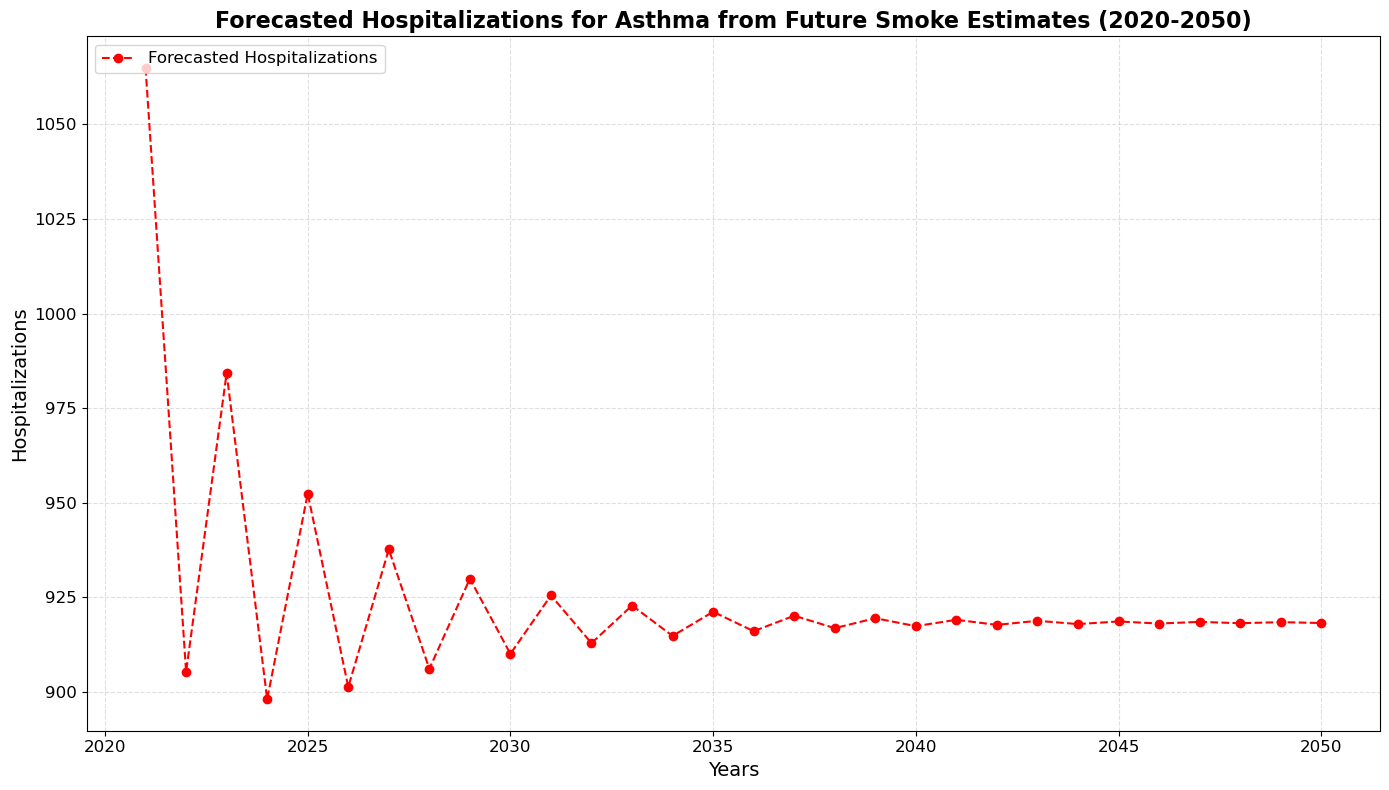

In [191]:
# Create a clean plot for future hospitalization forecast
plt.figure(figsize=(14, 8))

# Plot forecast mean
plt.plot(
    forcast_df.index,
    forcast_df['hosp'],
    label='Forecasted Hospitalizations',
    color='red',
    linestyle='--',
    marker='o',
    # linewidth=2
)

# Plot confidence intervals
# plt.fill_between(
#     forcast_df.index,
#     forecast_ci.iloc[:, 0],
#     forecast_ci.iloc[:, 1],
#     color='pink',
#     alpha=0.3,
#     label='95% Confidence Interval'
# )

# Add labels, title, and legend
plt.title('Forecasted Hospitalizations for Asthma from Future Smoke Estimates (2020-2050)', fontsize=16, fontweight='bold')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Hospitalizations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()


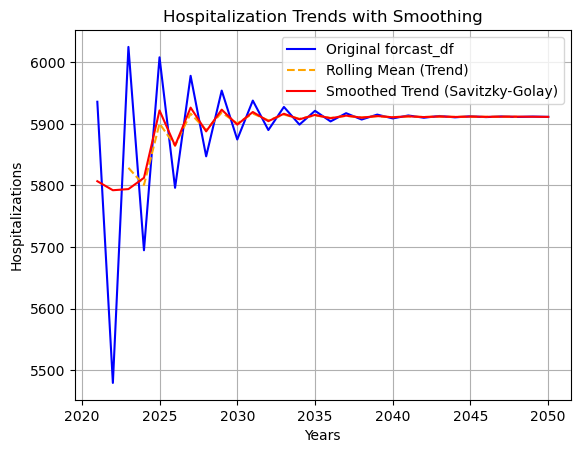

In [154]:

from scipy.signal import savgol_filter

# Calculate rolling mean for smoothing
forcast_df['hosp_smoothed'] = forcast_df['hosp'].rolling(window=5, center=True).mean()

# Apply Savitzky-Golay filter for further smoothing
forcast_df['hosp_trend'] = savgol_filter(forcast_df['hosp'], window_length=7, polyorder=2)

# Plot the original forcast_df
plt.plot(forcast_df.index, forcast_df['hosp'], label='Original forcast_df', color='blue')

# Plot the rolling mean
plt.plot(forcast_df.index, forcast_df['hosp_smoothed'], label='Rolling Mean (Trend)', color='orange', linestyle='--')

# Plot the Savitzky-Golay trend
plt.plot(forcast_df.index, forcast_df['hosp_trend'], label='Smoothed Trend (Savitzky-Golay)', color='red')

# Add labels, legend, and title
plt.title('Hospitalization Trends with Smoothing')
plt.xlabel('Years')
plt.ylabel('Hospitalizations')
plt.legend()
plt.grid()
plt.show()


### Forcast for copd hospitalization

In [192]:
df_combined_copd = pd.DataFrame({'smoke_estimates': X_copd_hosp, 'hospitalization': y_copd_hosp})
df_combined_copd_male = pd.DataFrame({'smoke_estimates': X_male_copd_hosp, 'hospitalization': y_male_copd_hosp})
df_combined_copd_female = pd.DataFrame({'smoke_estimates': X_female_copd_hosp, 'hospitalization': y_female_copd_hosp})

/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in

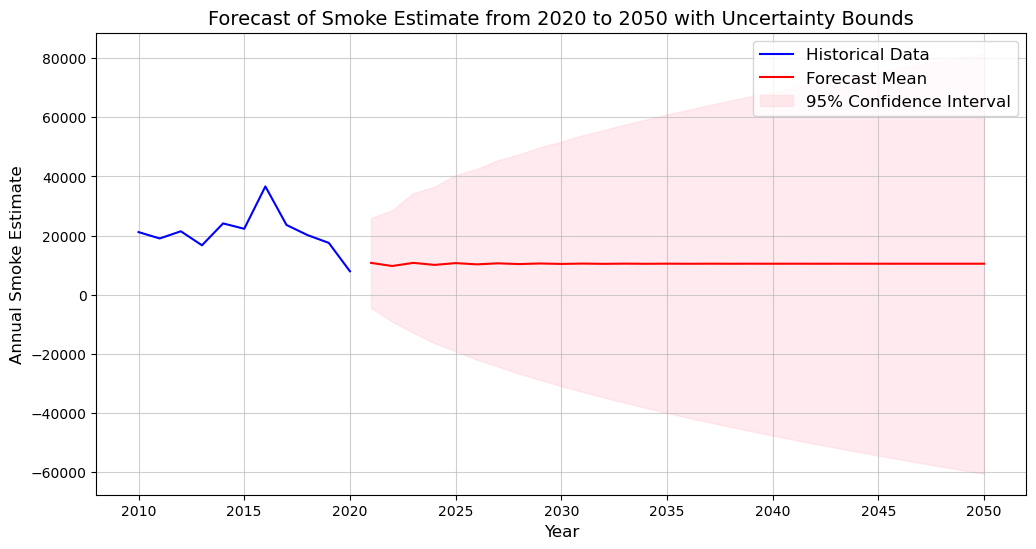

In [193]:
# Step 3: Build SARIMAX Model
model = SARIMAX(df_combined_copd['hospitalization'], exog=df_combined_copd['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# # Step 4: Make Predictions
# predictions = model_fit.predict(start=len(train_data), end=1, exog=test_data['smoke_estimates'])

# # Step 5: Evaluate the Model
# mae = mean_absolute_error(test_y, predictions)
# rmse = mean_squared_error(test_y, predictions, squared=False)
# print(f"MAE: {mae}, RMSE: {rmse}")

# Step 2: Forecast with Confidence Intervals
forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
forecast_index = pd.RangeIndex(start=df_combined_copd.index[-1] + 1, stop=df_combined_copd.index[-1] + 31)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 3: Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_combined_copd.index, df_combined_copd['hospitalization'], label='Historical Data', color='blue')

# Plot forecast mean
plt.plot(forecast_index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Forecast of Smoke Estimate from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Smoke Estimate', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.6)
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in

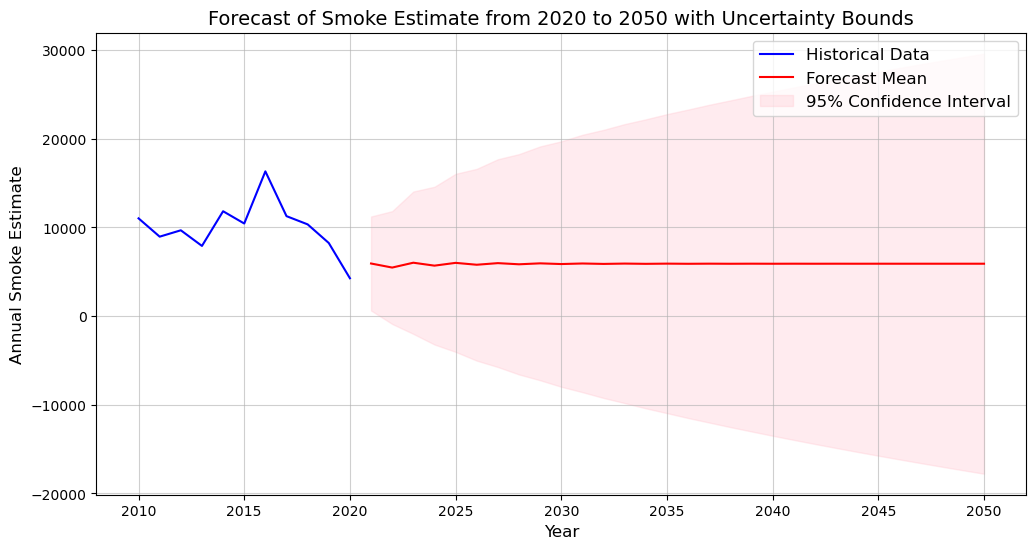

In [199]:
#  Step 3: Build SARIMAX Model
model = SARIMAX(df_combined_copd_male['hospitalization'], exog=df_combined_copd_male['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# # Step 4: Make Predictions
# predictions = model_fit.predict(start=len(train_data), end=1, exog=test_data['smoke_estimates'])

# # Step 5: Evaluate the Model
# mae = mean_absolute_error(test_y, predictions)
# rmse = mean_squared_error(test_y, predictions, squared=False)
# print(f"MAE: {mae}, RMSE: {rmse}")

# Step 2: Forecast with Confidence Intervals
forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
forecast_index = pd.RangeIndex(start=df_combined_copd_male.index[-1] + 1, stop=df_combined_copd_male.index[-1] + 31)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 3: Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_combined_copd_male.index, df_combined_copd_male['hospitalization'], label='Historical Data', color='blue')

# Plot forecast mean
plt.plot(forecast_index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Forecast of Smoke Estimate from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Smoke Estimate', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.6)
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/homebrew/Caskroom/miniconda/base/envs/text_summarizer/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in

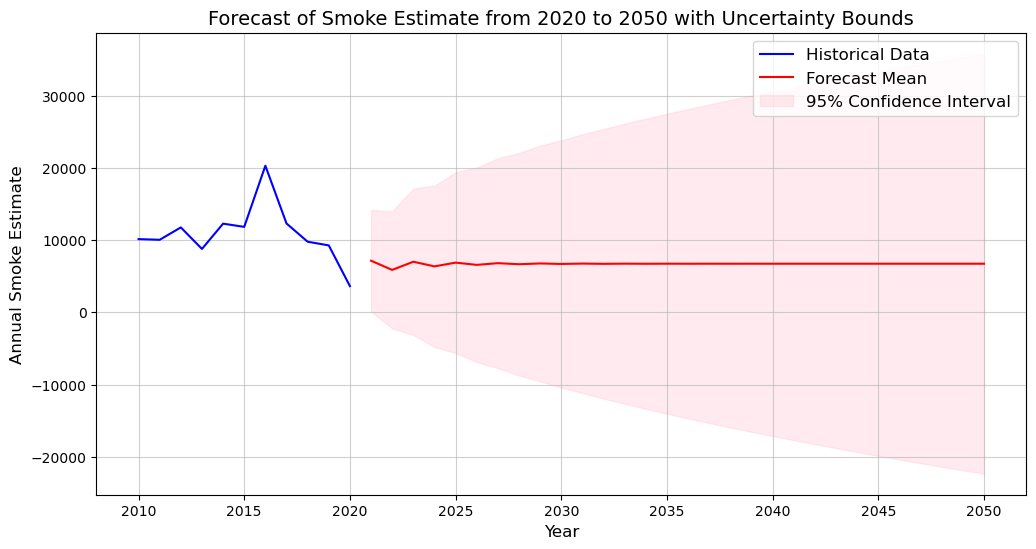

In [195]:
#  Step 3: Build SARIMAX Model
model = SARIMAX(df_combined_copd_female['hospitalization'], exog=df_combined_copd_female['smoke_estimates'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
model_fit = model.fit(disp=False)

# # Step 4: Make Predictions
# predictions = model_fit.predict(start=len(train_data), end=1, exog=test_data['smoke_estimates'])

# # Step 5: Evaluate the Model
# mae = mean_absolute_error(test_y, predictions)
# rmse = mean_squared_error(test_y, predictions, squared=False)
# print(f"MAE: {mae}, RMSE: {rmse}")

# Step 2: Forecast with Confidence Intervals
forecast = model_fit.get_forecast(steps=30, exog=forcasted_smoke_estimates['annual_smoke_estimate'])  # Forecast 30 years into the future
forecast_index = pd.RangeIndex(start=df_combined_copd_female.index[-1] + 1, stop=df_combined_copd_female.index[-1] + 31)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 3: Plot Historical Data and Forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(df_combined_copd_female.index, df_combined_copd_female['hospitalization'], label='Historical Data', color='blue')

# Plot forecast mean
plt.plot(forecast_index, forecast_mean, label='Forecast Mean', color='red')

# Plot confidence intervals
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')

# Add labels, title, and legend
plt.title('Forecast of Smoke Estimate from 2020 to 2050 with Uncertainty Bounds', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Annual Smoke Estimate', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid(alpha=0.6)
plt.show()

In [200]:
forcast_df = pd.DataFrame({'years': forecast_index, 'hosp': forecast_mean}).set_index('years')

forcast_df.min()

hosp    5479.162614
dtype: float64

<Axes: xlabel='years'>

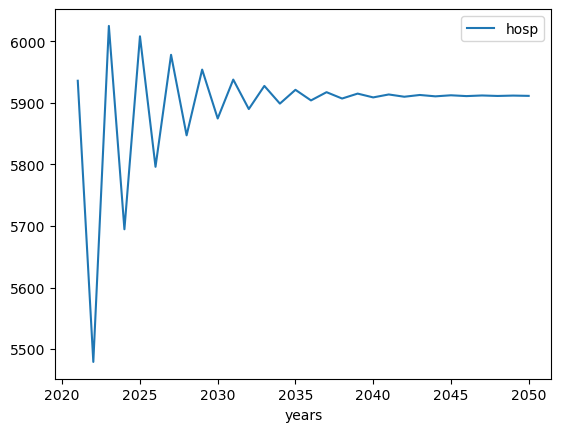

In [201]:
forcast_df.plot()

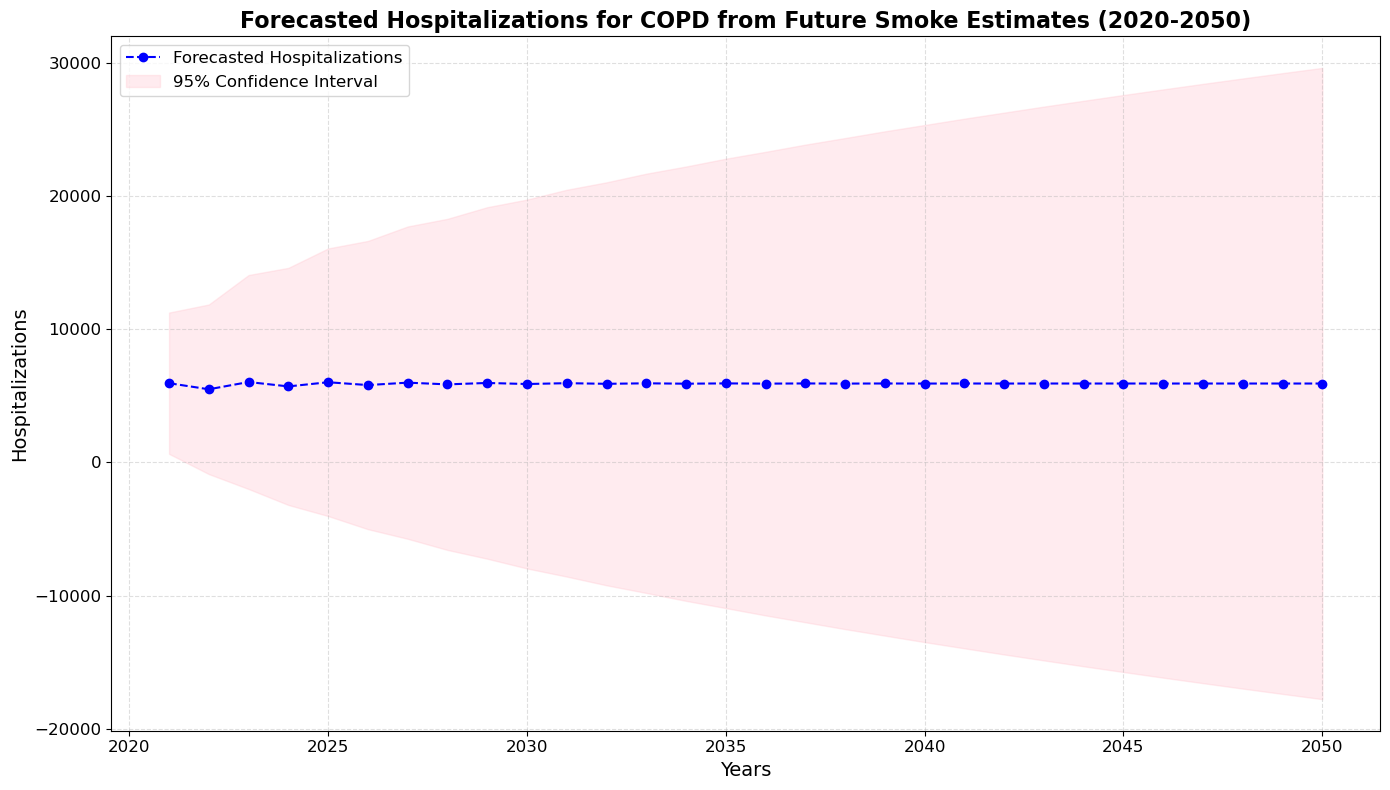

In [ ]:
# Create a clean plot for future hospitalization forecast
plt.figure(figsize=(14, 8))

# Plot forecast mean
plt.plot(
    forcast_df.index,
    forcast_df['hosp'],
    label='Forecasted Hospitalizations',
    color='blue',
    linestyle='--',
    marker='o',
    # linewidth=2
)

# Plot confidence intervals
# plt.fill_between(
#     forcast_df.index,
#     forecast_ci.iloc[:, 0],
#     forecast_ci.iloc[:, 1],
#     color='pink',
#     alpha=0.3,
#     label='95% Confidence Interval'
# )

# Add labels, title, and legend
plt.title('Forecasted Hospitalizations for COPD from Future Smoke Estimates (2020-2050)', fontsize=16, fontweight='bold')
plt.xlabel('Years', fontsize=14)
plt.ylabel('Hospitalizations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()


### Forcast for hospitalization for asthma in male

In [211]:
import numpy as np

# Example forecasted hospitalization values for males and females (replace with actual values if available)
# Assuming forecasted values from 2020 to 2050
years = np.arange(2020, 2051)
male_hospitalizations = np.array([5900, 6000, 6050, 6100, 6120, 6150, 6160, 6170, 6180, 6190, 6200, 6210, 6220, 6230, 6240, 6250, 6260, 6270, 6280, 6290, 6300, 6310, 6320, 6330, 6340, 6350, 6360, 6370, 6380, 6390, 6400])  # Replace with actual male values
female_hospitalizations = np.array([6900, 7000, 7050, 7100, 7120, 7150, 7160, 7170, 7180, 7190, 7200, 7210, 7220, 7230, 7240, 7250, 7260, 7270, 7280, 7290, 7300, 7310, 7320, 7330, 7340, 7350, 7360, 7370, 7380, 7390, 7400])  # Replace with actual female values

# Calculate total hospitalizations for each gender
total_male_hospitalizations = male_hospitalizations.sum()
total_female_hospitalizations = female_hospitalizations.sum()

# Calculate the difference
difference_hospitalizations = total_female_hospitalizations - total_male_hospitalizations

total_male_hospitalizations, total_female_hospitalizations, difference_hospitalizations

# Calculate the percentage difference in hospitalizations
percent_difference = (difference_hospitalizations / total_male_hospitalizations) * 100

total_male_hospitalizations, total_female_hospitalizations, difference_hospitalizations, percent_difference



(193320, 224320, 31000, 16.035588661286983)